# 1. Description
## Due to the COVID-19, oil price is really volatile. So, I want to forecast oil prices for analyzing future volatility. 

## I download all of data from Yahoo Finance. And I want to use time-series analysis to solve this problem. 

# 2. Methodology
## I find that time-series analysis is the best way to forecast oil prices.
## Let me explain it elaborately.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pandas import DataFrame as df

## I download WTI data from Yahoo Finance from 2015-01-02 to 2020-09-30 and try to forecast values of 2020-10-01 and 2020-10-02

In [ ]:
series = pd.read_csv(r'C:\Users\python\data\WTI3.csv', header=0, index_col=0, squeeze=True)
series.plot()

In [2]:
series

Date
2015-01-02    7.43
2015-01-05    6.73
2015-01-06    6.25
2015-01-07    6.20
2015-01-08    6.25
              ... 
2020-09-24    1.78
2020-09-25    1.75
2020-09-28    1.81
2020-09-29    1.83
2020-09-30    1.80
Name: Adj Close, Length: 1447, dtype: float64

## Through ACF and PACF analysis, we can find what ARIMA(p,d,q) model is most appropriate. 
## Since Autocorrelation decays slowly and value of PACF drops at 1, we can see arima(1,0,0) fits well. 

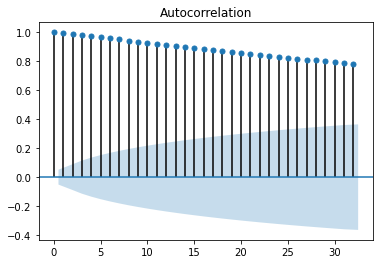

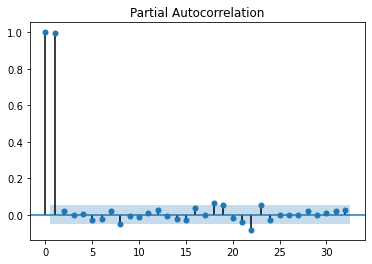

In [4]:
plot_acf(series)
plot_pacf(series)
plt.show()

## Through 1 differenciation, we can see this series is stationary. So, I determine d equals 1.

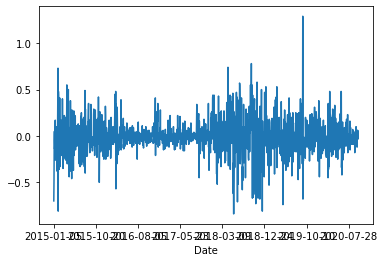

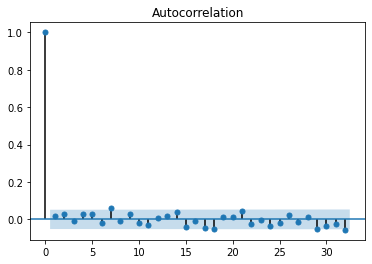

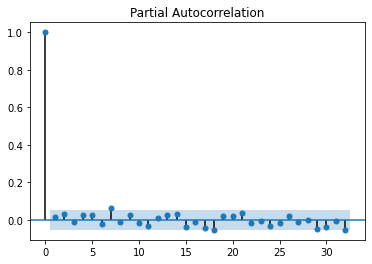

In [5]:
diff_1=series.diff(periods=1).iloc[1:]
diff_1.plot()
plot_acf(diff_1)
plot_pacf(diff_1)
plt.show()

## Through Arima analysis, however, ARIMA(1,1,1) is most appropriate for this model. Because, AIC and BIC is smaller than other models. Also, It has significant coefficents ar.L1.D.Adj Close and ma.L1.D.Adj Close which have lower p-value than 0.05 

In [6]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(series, order=(1,1,1))
model_fit = model.fit(trend='nc',full_output=True, disp=1)
print(model_fit.summary())

C:\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


                             ARIMA Model Results                              
Dep. Variable:            D.Adj Close   No. Observations:                 1446
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 358.415
Method:                       css-mle   S.D. of innovations              0.189
Date:                Thu, 29 Oct 2020   AIC                           -710.831
Time:                        23:51:34   BIC                           -695.001
Sample:                             1   HQIC                          -704.923
                                                                              
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
ar.L1.D.Adj Close     0.8112      0.148      5.478      0.000       0.521       1.101
ma.L1.D.Adj Close    -0.7875      0.155     -5.065      0.000      -1.092      -0.483
                        

## We can see it is well-fitted.

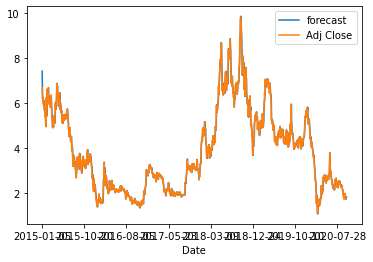

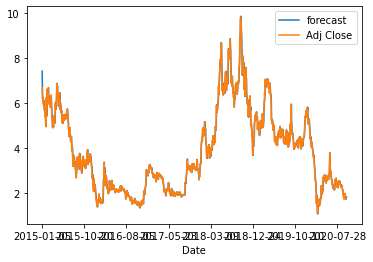

In [7]:
model_fit.plot_predict()

In [8]:
fore = model_fit.forecast(steps=3)
print(fore)

(array([1.79940051, 1.79891419, 1.79851967]), array([0.18884914, 0.27026612, 0.33443243]), array([[1.429263  , 2.16953802],
       [1.26920233, 2.32862604],
       [1.14304415, 2.45399519]]))


## That is what we forecast

In [9]:
forecast = pd.DataFrame({'Date':[20201001],
                             'Prediction':[fore[0][0]],
                             'Real Value':[1.81]})
forecast

,Date,Prediction,Real Value
0,20201001,1.799401,1.81


In [10]:
series.loc["2020-10-01"] = 1.81        
print(series)

Date
2015-01-02    7.43
2015-01-05    6.73
2015-01-06    6.25
2015-01-07    6.20
2015-01-08    6.25
              ... 
2020-09-25    1.75
2020-09-28    1.81
2020-09-29    1.83
2020-09-30    1.80
2020-10-01    1.81
Name: Adj Close, Length: 1448, dtype: float64


## From now on, we try to predict 2020-10-02

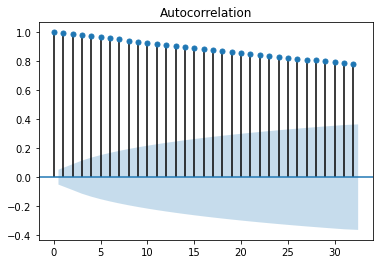

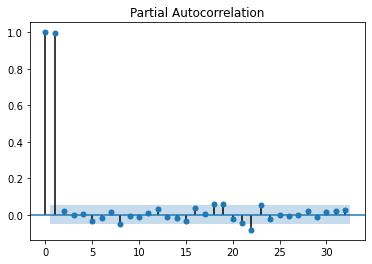

In [11]:
plot_acf(series)
plot_pacf(series)
plt.show()

In [12]:
model = ARIMA(series, order=(1,1,1))
model_fit = model.fit(trend='nc',full_output=True, disp=1)
print(model_fit.summary())

C:\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


                             ARIMA Model Results                              
Dep. Variable:            D.Adj Close   No. Observations:                 1447
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 359.162
Method:                       css-mle   S.D. of innovations              0.189
Date:                Thu, 29 Oct 2020   AIC                           -712.324
Time:                        23:51:35   BIC                           -696.492
Sample:                             1   HQIC                          -706.415
                                                                              
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
ar.L1.D.Adj Close     0.8112      0.148      5.478      0.000       0.521       1.101
ma.L1.D.Adj Close    -0.7874      0.155     -5.066      0.000      -1.092      -0.483
                        

In [13]:
fore = model_fit.forecast(steps=1)
print(fore)

(array([1.80976593]), array([0.18878408]), array([[1.43975594, 2.17977593]]))


## we can see it reflects tendency well.

In [14]:
forecast = pd.DataFrame({'Date':[20201002],
                             'Prediction':[fore[0][0]],
                             'Real Value':[1.84]})
forecast

,Date,Prediction,Real Value
0,20201002,1.809766,1.84


## By using this model, it is hard to predict the value perfectly. But, we can check tendency of oil prices.
## Through this capstone project, I can learn lots of ways to analyze data.